# Condutância da pele vs Tipo de Filmes


Nesta segunda parte do **tutorial** iremos explorar um dataset já existente e adaptá-lo à hipótese que se deseja testar.

In [25]:
#@title
# Data Loading
import gspread
import numpy as np
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from google.colab import files
from google.colab import drive
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.colab import auth
auth.authenticate_user()  # verify your account to read files which you have access to. Make sure you have permission to read the file!
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default()) 
spreadsheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1txjs1FZdjR7FEGTZhiIMgmzbVMnnU_Aboud_Qw3JOlQ/edit?usp=sharing') # use this when you have the complete url (the edit#gid means permission)
sheet =  spreadsheet.get_worksheet(0)
df = pd.DataFrame(sheet.get_all_records())
df = df.rename(columns={"Participant-ID": "Contagem", "Sex": "Género", "Age-Group": "Grupo de Idade"})

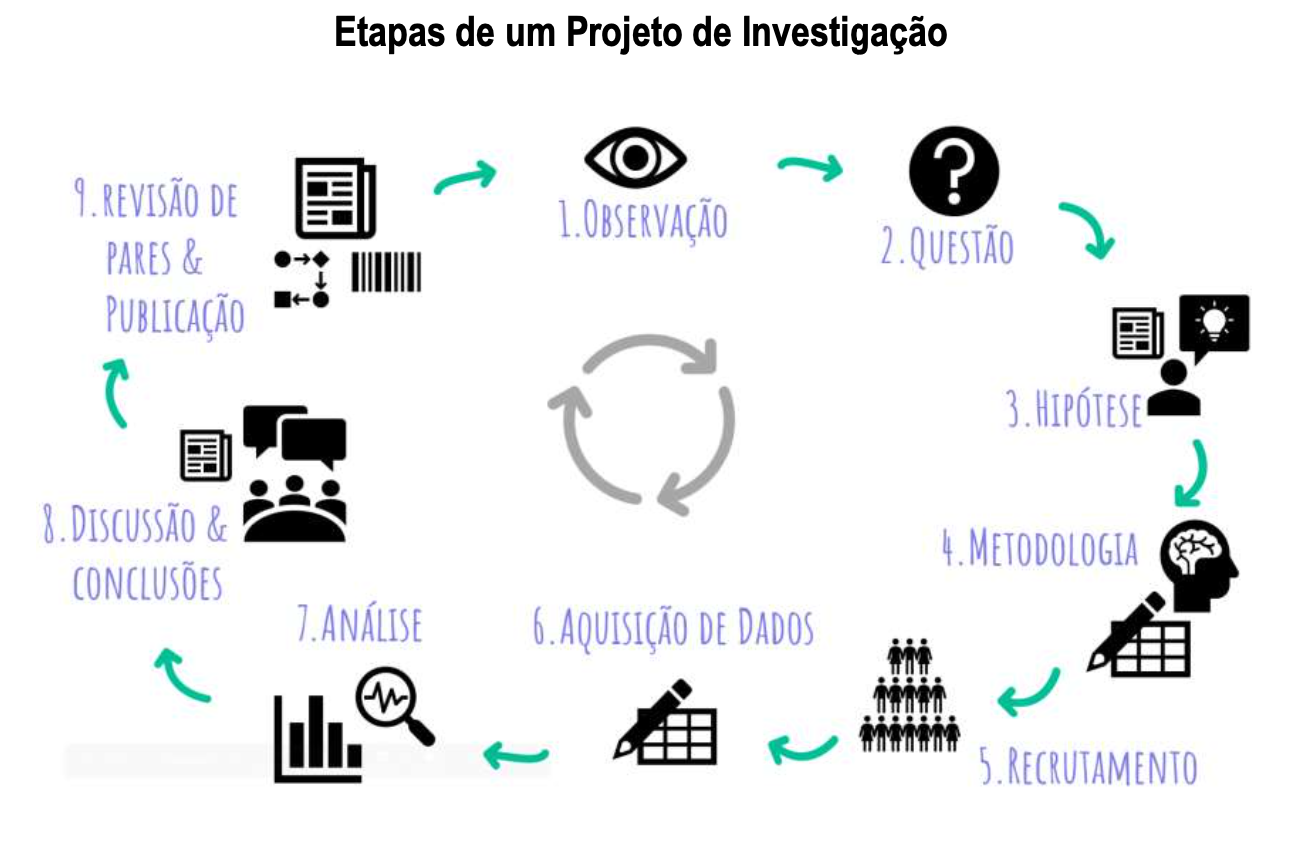

## Etapas 5, 6

Dado a situação actual que vivemos será mais fácil e rápido utilizar dados que outros cientistas adquiriram e disponilizaram para toda a comunidade científica. Cada vez mais os cientistas têm a preocupação de partilhar dados que adquiriram com a comunidade. Isto tem inúmeros benefícios, entre eles:

1.   Económico
2.   Ambiental
3.   Tempo

Por exemplo, a acquisição de imagens de ressonância magnetica é dispendiosa, requer algum tempo e consume bastante energia (a ressonância consume o equivalente a 10 aquecedores), pelo que se pudermos utilizar dados existentes é muito melhor :D. 

No entanto, para que isto seja possível os dados têm de cumprir os seguintes requisitos:


1.   Localizáveis (**F**indability)
2.   Acessíveis (**A**cessibility)
3.   Interoperáveis (**I**nteroperability)
4.   Reutilizáveis (**R**eusability)

Os requisitos anteriores fazem parte de um conjunto de diretrizes que têm como objectivo facilitar a divulgação de dados de uma forma fácil e simples para que estes sejam utilizados novamente.


Posto isto, e após uma pesquisa, verficámos que os dados abaixo permitiam verificar a vossa questão científica:


> [A dataset of continuous affect annotations and physiological signals for emotion analysis](https://www.nature.com/articles/s41597-019-0209-0)




### A dataset of continuous affect annotations and physiological signals for emotion analysis

Nas próxima secções iremos verificar a metodologia de aquisição dos dados, assim como explorar características dos participantes :)

Abaixo encontra-se uma fotografia da uma acquisição para um participante.

Exemplo de uma aquisição: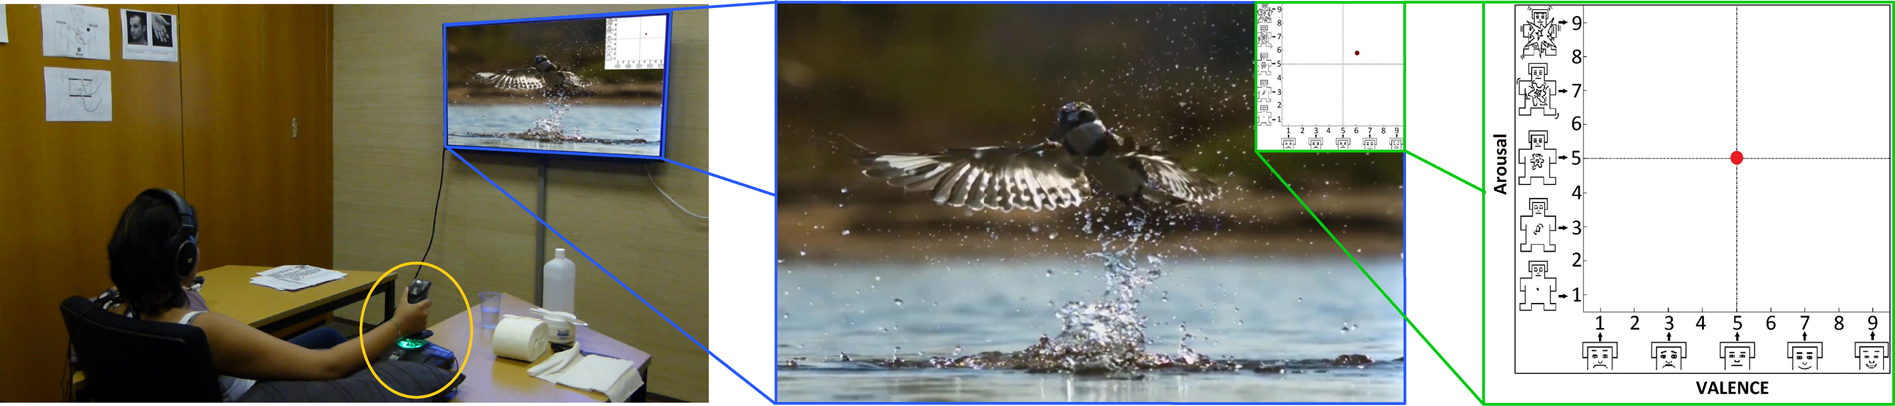

### Participantes

O estudo recrutou 30 participantes dos quais 15 elementos são do género feminino e 15 do género masculino, com idades compreendidas entre os 20 e 40 anos. Em baixo conseguem ver a lista de todos os participantes:




In [28]:
#@title
print(df)

    Contagem Género Grupo de Idade
0          1      F          30-34
1          2      F          25-29
2          3      F          30-34
3          4      F          20-24
4          5      M          20-24
5          6      M          30-34
6          7      M          25-29
7          8      F          25-29
8          9      F          20-24
9         10      M          35-39
10        11      M          25-29
11        12      M          25-29
12        13      F          25-29
13        14      M          20-24
14        15      F          20-24
15        16      F          20-24
16        17      F          20-24
17        18      M          25-29
18        19      F          20-24
19        20      M          35-39
20        21      M          20-24
21        22      F          20-24
22        23      M          25-29
23        24      F          25-29
24        25      F          25-29
25        26      M          25-29
26        27      M          25-29
27        28      M 

No entanto, ainda são alguns participantes, e torna-se difícil extrair informação da tabela. Por exemplo, temos o mesmo número de participantes de ambos os géneros, mas e por idade? Os participantes para grupo de idade são os mesmos?

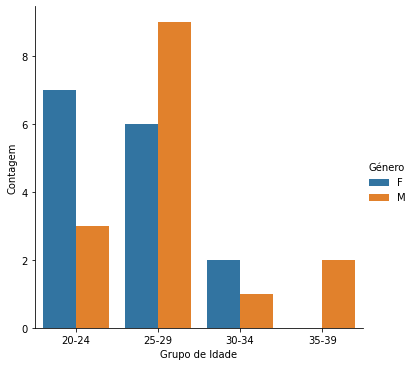

In [26]:
#@title

import matplotlib.pyplot as plt
import seaborn as sns

df_group = df.groupby(by=["Grupo de Idade", "Género"]).count().reset_index()
_ = sns.catplot(data=df_group, x="Grupo de Idade", y="Contagem", hue="Género", kind="bar")


#### Questão
Quais e quantos participantes que vão utilizar?  

#### Resposta 
[Preencher aqui]

### Dados Recolhidos
Foram recolhidos vários tipos de dados entre eles:

*   Electrocardiograma
*   Fotopletismografia
*   Resposta galvânica da pele
*   Temperatura da pele
*   Electromiograma


#### Questão 
Quais os sinais que vão utilizar?

#### Resposta
[Preencher aqui]

### Filmes
Cada participante assistiu a oito filmes de 4 categorias distintas (dois por categoria):

**Divertido**:
*   When Harry Met Sally (1989)
*   Hangover (2009)

**Aborrecido**:
*   Matcha: The way of Tea (2012)
*   Europe Travel Skills (2013) 

**Relaxado**:
*   Relaxing Music with Beach (2011)
*   Natural World: Zambezi (2012)

**Assustador**:
*   Shutter (2004)
*   Mama (2008)


#### Questão
Tendo em conta a vossa hipótese que categorias fazem sentido utilizar? E que qual o filme que representa a categoria?

#### Resposta
[Preencher aqui]